<a href="https://colab.research.google.com/github/S2ONe3/Image-Based-Fashion-Reccomendation/blob/main/Img_Based_Recc_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [ ]:
#parameters

imgs_path = "C:/Users/aritr/AppData/Local/Temp/archive/style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 10 # number of most similar images to retrieve

In [ ]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "png" in x]

print("number of images:",len(files))

number of images: 2184


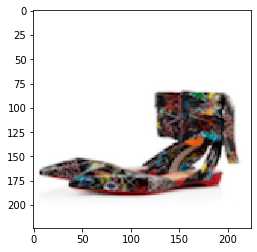

image loaded successfully!


In [ ]:
# load an image in PIL format
original = load_img(files[1], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [ ]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)
numpy_image = np.array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [ ]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

features successfully extracted!
number of image features: 4096


array([[0.        , 0.        , 0.        , ..., 0.72294056, 3.5057728 ,
        0.705074  ]], dtype=float32)

In [ ]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = np.array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [ ]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(2184, 4096)

In [ ]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_001.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_002.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_003.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_004.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_005.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_006.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_007.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_008.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_009.png,C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_010.png,...,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_012.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_013.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_014.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_015.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_016.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_017.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_018.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_019.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_020.png,C:/Users/aritr/AppData/Local/Temp/archive/style/6_9_021.png
C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_001.png,1.000000,0.554047,0.558606,0.569193,0.521644,0.592031,0.503121,0.587526,0.352372,0.402142,...,0.301020,0.259099,0.247524,0.354853,0.276685,0.399439,0.215223,0.263318,0.362413,0.295160
C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_002.png,0.554047,1.000000,0.352095,0.421485,0.522096,0.451593,0.321059,0.683562,0.364141,0.295505,...,0.285047,0.265274,0.204258,0.326139,0.348535,0.518782,0.210399,0.309710,0.334937,0.271462
C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_003.png,0.558606,0.352095,1.000000,0.818573,0.382171,0.444806,0.624093,0.450202,0.348380,0.279828,...,0.403518,0.339660,0.243398,0.399831,0.352441,0.292396,0.251002,0.329957,0.379226,0.276617
C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_004.png,0.569193,0.421485,0.818573,1.000000,0.416590,0.525976,0.636036,0.499584,0.374038,0.305759,...,0.345944,0.351291,0.293232,0.341896,0.342100,0.295175,0.220416,0.323877,0.377279,0.299922
C:/Users/aritr/AppData/Local/Temp/archive/style/0_0_005.png,0.521644,0.522096,0.382171,0.416590,1.000000,0.473509,0.325196,0.599150,0.506764,0.393804,...,0.254234,0.241989,0.264299,0.371280,0.313445,0.401367,0.157718,0.258876,0.314481,0.281415


In [ ]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


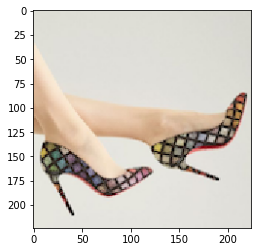

-----------------------------------------------------------------------
most similar products:


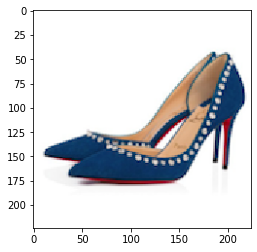

similarity score :  0.62335324


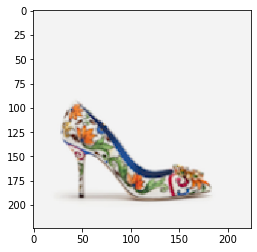

similarity score :  0.60831213


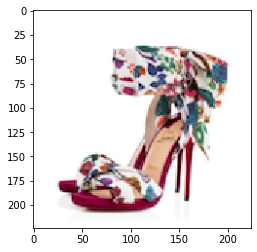

similarity score :  0.5991497


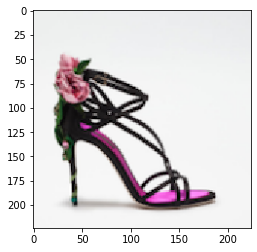

similarity score :  0.5867548


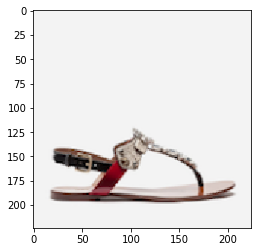

similarity score :  0.5836849


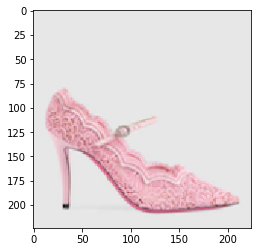

similarity score :  0.57748276


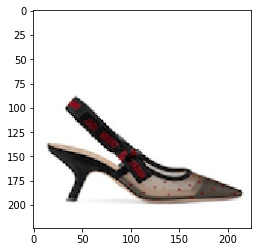

similarity score :  0.5773443


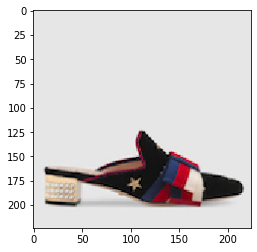

similarity score :  0.5687807


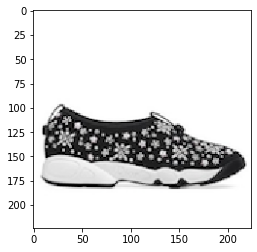

similarity score :  0.5678973


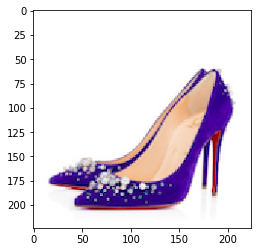

similarity score :  0.5652634


In [ ]:
retrieve_most_similar_products(files[4])